In [1]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [3]:
dataset.load_all_data(color=['black'], size=['single'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed black key: 8755
  # of unpressed black key: 43701


IntProgress(value=0, max=5000)

In testset: 
  # of pressed black key: 761
  # of unpressed black key: 22514


IntProgress(value=0, max=2993)

In valset: 
  # of pressed black key: 817
  # of unpressed black key: 10902


In [4]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=87402)

(2, 106, 20, 3)
1 0
Samples from X_test: 


IntProgress(value=0, max=23275)

(2, 106, 20, 3)
0 0
Samples from X_val: 


IntProgress(value=0, max=11719)

(2, 106, 20, 3)
0 0


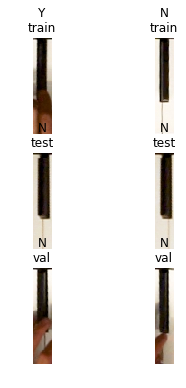

In [5]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb, _ in dataset.data_batch(type=_type, size='single', color='black', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [6]:
bmodel = models.get_black_key_model(channels)
bmodel.train(dataset, batch_size=32, size='single', color='black',
             concatenate=concat,
             num_epochs=200,
             weight_decay=0.1,
             max_num=-1,
             learning_rate=1e-3,
             decay_every=10,
             decay_by=0.5,
             best_path='keypress_recognition/best_black_model.tar',
             current_path='keypress_recognition/current_black.tar',
             method=0)

Epoch 1/200


IntProgress(value=0, max=87402)

train Loss: 0.3570
[[39464  2703]
 [ 4248 41009]]
Precision: 0.91
Recall   : 0.94
Accuracy : 0.92


IntProgress(value=0, max=11719)

val Loss: 0.1530
[[10304    27]
 [  623   790]]
Precision: 0.56
Recall   : 0.97
Accuracy : 0.94
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 2/200


IntProgress(value=0, max=87402)

train Loss: 0.3236
[[39751  2986]
 [ 3961 40726]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11719)

val Loss: 0.2146
[[9986    2]
 [ 941  815]]
Precision: 0.46
Recall   : 1.00
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 3/200


IntProgress(value=0, max=87402)

train Loss: 0.3201
[[39694  3178]
 [ 4018 40534]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11719)

val Loss: 0.0643
[[10904   279]
 [   23   538]]
Precision: 0.96
Recall   : 0.66
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 4/200


IntProgress(value=0, max=87402)

train Loss: 0.3140
[[40008  2985]
 [ 3704 40727]]
Precision: 0.92
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11719)

val Loss: 0.0901
[[10610    37]
 [  317   780]]
Precision: 0.71
Recall   : 0.95
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 5/200


IntProgress(value=0, max=87402)

train Loss: 0.3152
[[39890  3104]
 [ 3822 40608]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11719)

val Loss: 0.0661
[[10807   230]
 [  120   587]]
Precision: 0.83
Recall   : 0.72
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 6/200


IntProgress(value=0, max=87402)

train Loss: 0.3150
[[39698  3114]
 [ 4014 40598]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11719)

val Loss: 0.0667
[[10845   243]
 [   82   574]]
Precision: 0.88
Recall   : 0.70
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 7/200


IntProgress(value=0, max=87402)

train Loss: 0.3129
[[39962  3164]
 [ 3750 40548]]
Precision: 0.92
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11719)

val Loss: 0.0769
[[10613    27]
 [  314   790]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 8/200


IntProgress(value=0, max=87402)

train Loss: 0.3109
[[40054  2837]
 [ 3658 40875]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11719)

val Loss: 0.1604
[[10445    16]
 [  482   801]]
Precision: 0.62
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 9/200


IntProgress(value=0, max=87402)

train Loss: 0.3111
[[40101  2821]
 [ 3611 40891]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11719)

val Loss: 0.0564
[[10737    55]
 [  190   762]]
Precision: 0.80
Recall   : 0.93
Accuracy : 0.98
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 10/200


IntProgress(value=0, max=87402)

train Loss: 0.3135
[[40094  2815]
 [ 3618 40897]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11719)

val Loss: 0.0839
[[10700   121]
 [  227   696]]
Precision: 0.75
Recall   : 0.85
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 11/200


IntProgress(value=0, max=87402)

train Loss: 0.2941
[[40594  2170]
 [ 3118 41542]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0924
[[10596    38]
 [  331   779]]
Precision: 0.70
Recall   : 0.95
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 12/200


IntProgress(value=0, max=87402)

train Loss: 0.2920
[[40514  2157]
 [ 3198 41555]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0779
[[10628    29]
 [  299   788]]
Precision: 0.72
Recall   : 0.96
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 13/200


IntProgress(value=0, max=87402)

train Loss: 0.2910
[[40537  2335]
 [ 3175 41377]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0690
[[10640    30]
 [  287   787]]
Precision: 0.73
Recall   : 0.96
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 14/200


IntProgress(value=0, max=87402)

train Loss: 0.2880
[[40555  2311]
 [ 3157 41401]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.1383
[[10308     8]
 [  619   809]]
Precision: 0.57
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 15/200


IntProgress(value=0, max=87402)

train Loss: 0.2892
[[40570  2252]
 [ 3142 41460]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.1380
[[10384    15]
 [  543   802]]
Precision: 0.60
Recall   : 0.98
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 16/200


IntProgress(value=0, max=87402)

train Loss: 0.2892
[[40637  2188]
 [ 3075 41524]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0679
[[10763   126]
 [  164   691]]
Precision: 0.81
Recall   : 0.85
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 17/200


IntProgress(value=0, max=87402)

train Loss: 0.2894
[[40498  2255]
 [ 3214 41457]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.1473
[[10375    14]
 [  552   803]]
Precision: 0.59
Recall   : 0.98
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 18/200


IntProgress(value=0, max=87402)

train Loss: 0.2902
[[40479  2287]
 [ 3233 41425]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0799
[[10617    33]
 [  310   784]]
Precision: 0.72
Recall   : 0.96
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 19/200


IntProgress(value=0, max=87402)

train Loss: 0.2847
[[40664  2048]
 [ 3048 41664]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0566
[[10864   237]
 [   63   580]]
Precision: 0.90
Recall   : 0.71
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 20/200


IntProgress(value=0, max=87402)

train Loss: 0.2873
[[40442  2123]
 [ 3270 41589]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0797
[[10629    41]
 [  298   776]]
Precision: 0.72
Recall   : 0.95
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 21/200


IntProgress(value=0, max=87402)

train Loss: 0.2736
[[40888  1906]
 [ 2824 41806]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.1068
[[10483    10]
 [  444   807]]
Precision: 0.65
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 22/200


IntProgress(value=0, max=87402)

train Loss: 0.2706
[[40951  1814]
 [ 2761 41898]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0877
[[10553    28]
 [  374   789]]
Precision: 0.68
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 23/200


IntProgress(value=0, max=87402)

train Loss: 0.2714
[[40775  1988]
 [ 2937 41724]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.1506
[[10284    10]
 [  643   807]]
Precision: 0.56
Recall   : 0.99
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 24/200


IntProgress(value=0, max=87402)

train Loss: 0.2717
[[40859  1981]
 [ 2853 41731]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.1818
[[10229     5]
 [  698   812]]
Precision: 0.54
Recall   : 0.99
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 25/200


IntProgress(value=0, max=87402)

train Loss: 0.2710
[[40839  2027]
 [ 2873 41685]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.1323
[[10482    14]
 [  445   803]]
Precision: 0.64
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 26/200


IntProgress(value=0, max=87402)

train Loss: 0.2719
[[40876  1926]
 [ 2836 41786]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.1100
[[10418    12]
 [  509   805]]
Precision: 0.61
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 27/200


IntProgress(value=0, max=87402)

train Loss: 0.2705
[[40783  1965]
 [ 2929 41747]]
Precision: 0.93
Recall   : 0.96
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.1112
[[10511    14]
 [  416   803]]
Precision: 0.66
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 28/200


IntProgress(value=0, max=87402)

train Loss: 0.2700
[[40879  2011]
 [ 2833 41701]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0806
[[10606    28]
 [  321   789]]
Precision: 0.71
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 29/200


IntProgress(value=0, max=87402)

train Loss: 0.2700
[[40812  1948]
 [ 2900 41764]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0807
[[10616    27]
 [  311   790]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 30/200


IntProgress(value=0, max=87402)

train Loss: 0.2688
[[40818  2074]
 [ 2894 41638]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11719)

val Loss: 0.0776
[[10637    21]
 [  290   796]]
Precision: 0.73
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 31/200


IntProgress(value=0, max=87402)

train Loss: 0.2583
[[41123  1681]
 [ 2589 42031]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0948
[[10561    18]
 [  366   799]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 32/200


IntProgress(value=0, max=87402)

train Loss: 0.2584
[[41095  1721]
 [ 2617 41991]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0778
[[10589    16]
 [  338   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 33/200


IntProgress(value=0, max=87402)

train Loss: 0.2600
[[41052  1648]
 [ 2660 42064]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0791
[[10619    25]
 [  308   792]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 34/200


IntProgress(value=0, max=87402)

train Loss: 0.2587
[[41083  1672]
 [ 2629 42040]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0715
[[10678    32]
 [  249   785]]
Precision: 0.76
Recall   : 0.96
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 35/200


IntProgress(value=0, max=87402)

train Loss: 0.2578
[[41128  1667]
 [ 2584 42045]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0869
[[10601    25]
 [  326   792]]
Precision: 0.71
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 36/200


IntProgress(value=0, max=87402)

train Loss: 0.2569
[[41124  1684]
 [ 2588 42028]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0785
[[10611    21]
 [  316   796]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 37/200


IntProgress(value=0, max=87402)

train Loss: 0.2584
[[41081  1743]
 [ 2631 41969]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0692
[[10690    39]
 [  237   778]]
Precision: 0.77
Recall   : 0.95
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 38/200


IntProgress(value=0, max=87402)

train Loss: 0.2564
[[41082  1692]
 [ 2630 42020]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0812
[[10610    20]
 [  317   797]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 39/200


IntProgress(value=0, max=87402)

train Loss: 0.2576
[[41062  1699]
 [ 2650 42013]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.1395
[[10303     7]
 [  624   810]]
Precision: 0.56
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 40/200


IntProgress(value=0, max=87402)

train Loss: 0.2564
[[41054  1711]
 [ 2658 42001]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.1204
[[10382     9]
 [  545   808]]
Precision: 0.60
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 41/200


IntProgress(value=0, max=87402)

train Loss: 0.2496
[[41207  1549]
 [ 2505 42163]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0776
[[10630    23]
 [  297   794]]
Precision: 0.73
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 42/200


IntProgress(value=0, max=87402)

train Loss: 0.2492
[[41257  1532]
 [ 2455 42180]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0830
[[10617    16]
 [  310   801]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 43/200


IntProgress(value=0, max=87402)

train Loss: 0.2487
[[41224  1594]
 [ 2488 42118]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0793
[[10616    19]
 [  311   798]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 44/200


IntProgress(value=0, max=87402)

train Loss: 0.2485
[[41266  1592]
 [ 2446 42120]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0932
[[10512    15]
 [  415   802]]
Precision: 0.66
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 45/200


IntProgress(value=0, max=87402)

train Loss: 0.2478
[[41214  1547]
 [ 2498 42165]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0577
[[10736    28]
 [  191   789]]
Precision: 0.81
Recall   : 0.97
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 46/200


IntProgress(value=0, max=87402)

train Loss: 0.2477
[[41260  1595]
 [ 2452 42117]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0900
[[10542    15]
 [  385   802]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 47/200


IntProgress(value=0, max=87402)

train Loss: 0.2475
[[41268  1544]
 [ 2444 42168]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.1029
[[10468    13]
 [  459   804]]
Precision: 0.64
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 48/200


IntProgress(value=0, max=87402)

train Loss: 0.2474
[[41215  1580]
 [ 2497 42132]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0813
[[10598    15]
 [  329   802]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 49/200


IntProgress(value=0, max=87402)

train Loss: 0.2478
[[41250  1523]
 [ 2462 42189]]
Precision: 0.94
Recall   : 0.97
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0898
[[10578    15]
 [  349   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 50/200


IntProgress(value=0, max=87402)

train Loss: 0.2476
[[41287  1585]
 [ 2425 42127]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11719)

val Loss: 0.0860
[[10590    15]
 [  337   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 51/200


IntProgress(value=0, max=87402)

train Loss: 0.2418
[[41358  1507]
 [ 2354 42205]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0960
[[10520    15]
 [  407   802]]
Precision: 0.66
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 52/200


IntProgress(value=0, max=87402)

train Loss: 0.2418
[[41295  1464]
 [ 2417 42248]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0899
[[10546    13]
 [  381   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 53/200


IntProgress(value=0, max=87402)

train Loss: 0.2420
[[41309  1508]
 [ 2403 42204]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.1021
[[10515     9]
 [  412   808]]
Precision: 0.66
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 54/200


IntProgress(value=0, max=87402)

train Loss: 0.2420
[[41357  1473]
 [ 2355 42239]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0762
[[10622    16]
 [  305   801]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 55/200


IntProgress(value=0, max=87402)

train Loss: 0.2414
[[41336  1498]
 [ 2376 42214]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.1085
[[10486     9]
 [  441   808]]
Precision: 0.65
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 56/200


IntProgress(value=0, max=87402)

train Loss: 0.2423
[[41343  1478]
 [ 2369 42234]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0833
[[10592    15]
 [  335   802]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 57/200


IntProgress(value=0, max=87402)

train Loss: 0.2415
[[41345  1497]
 [ 2367 42215]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0797
[[10600    16]
 [  327   801]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 58/200


IntProgress(value=0, max=87402)

train Loss: 0.2416
[[41328  1530]
 [ 2384 42182]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0777
[[10615    16]
 [  312   801]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 59/200


IntProgress(value=0, max=87402)

train Loss: 0.2409
[[41346  1460]
 [ 2366 42252]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0947
[[10538    14]
 [  389   803]]
Precision: 0.67
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 60/200


IntProgress(value=0, max=87402)

train Loss: 0.2404
[[41334  1498]
 [ 2378 42214]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0695
[[10665    19]
 [  262   798]]
Precision: 0.75
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 61/200


IntProgress(value=0, max=87402)

train Loss: 0.2376
[[41374  1452]
 [ 2338 42260]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0858
[[10574    13]
 [  353   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 62/200


IntProgress(value=0, max=87402)

train Loss: 0.2382
[[41389  1449]
 [ 2323 42263]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0801
[[10607    15]
 [  320   802]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 63/200


IntProgress(value=0, max=87402)

train Loss: 0.2376
[[41415  1407]
 [ 2297 42305]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0976
[[10525    10]
 [  402   807]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 64/200


IntProgress(value=0, max=87402)

train Loss: 0.2372
[[41389  1431]
 [ 2323 42281]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0951
[[10534    11]
 [  393   806]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 65/200


IntProgress(value=0, max=87402)

train Loss: 0.2373
[[41377  1455]
 [ 2335 42257]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0806
[[10597    13]
 [  330   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 66/200


IntProgress(value=0, max=87402)

train Loss: 0.2365
[[41399  1447]
 [ 2313 42265]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0778
[[10619    19]
 [  308   798]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 67/200


IntProgress(value=0, max=87402)

train Loss: 0.2372
[[41398  1456]
 [ 2314 42256]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0752
[[10635    15]
 [  292   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 68/200


IntProgress(value=0, max=87402)

train Loss: 0.2369
[[41369  1414]
 [ 2343 42298]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0789
[[10621    16]
 [  306   801]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 69/200


IntProgress(value=0, max=87402)

train Loss: 0.2366
[[41364  1468]
 [ 2348 42244]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0837
[[10574    14]
 [  353   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 70/200


IntProgress(value=0, max=87402)

train Loss: 0.2357
[[41414  1449]
 [ 2298 42263]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0625
[[10725    32]
 [  202   785]]
Precision: 0.80
Recall   : 0.96
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 71/200


IntProgress(value=0, max=87402)

train Loss: 0.2352
[[41422  1435]
 [ 2290 42277]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0755
[[10625    17]
 [  302   800]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 72/200


IntProgress(value=0, max=87402)

train Loss: 0.2350
[[41402  1402]
 [ 2310 42310]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0768
[[10633    14]
 [  294   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 73/200


IntProgress(value=0, max=87402)

train Loss: 0.2355
[[41408  1438]
 [ 2304 42274]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0731
[[10632    16]
 [  295   801]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 74/200


IntProgress(value=0, max=87402)

train Loss: 0.2345
[[41403  1406]
 [ 2309 42306]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0764
[[10620    15]
 [  307   802]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 75/200


IntProgress(value=0, max=87402)

train Loss: 0.2350
[[41400  1428]
 [ 2312 42284]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0756
[[10632    16]
 [  295   801]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 76/200


IntProgress(value=0, max=87402)

train Loss: 0.2345
[[41428  1426]
 [ 2284 42286]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0725
[[10657    17]
 [  270   800]]
Precision: 0.75
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 77/200


IntProgress(value=0, max=87402)

train Loss: 0.2353
[[41400  1399]
 [ 2312 42313]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0828
[[10584    14]
 [  343   803]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 78/200


IntProgress(value=0, max=87402)

train Loss: 0.2331
[[41430  1425]
 [ 2282 42287]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0820
[[10586    12]
 [  341   805]]
Precision: 0.70
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 79/200


IntProgress(value=0, max=87402)

train Loss: 0.2333
[[41384  1424]
 [ 2328 42288]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0743
[[10635    15]
 [  292   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 80/200


IntProgress(value=0, max=87402)

train Loss: 0.2343
[[41411  1448]
 [ 2301 42264]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0743
[[10633    16]
 [  294   801]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 81/200


IntProgress(value=0, max=87402)

train Loss: 0.2326
[[41446  1434]
 [ 2266 42278]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0804
[[10599    13]
 [  328   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 82/200


IntProgress(value=0, max=87402)

train Loss: 0.2335
[[41411  1423]
 [ 2301 42289]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0816
[[10594    13]
 [  333   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 83/200


IntProgress(value=0, max=87402)

train Loss: 0.2327
[[41432  1417]
 [ 2280 42295]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0740
[[10644    17]
 [  283   800]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 84/200


IntProgress(value=0, max=87402)

train Loss: 0.2333
[[41447  1414]
 [ 2265 42298]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0738
[[10634    15]
 [  293   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 85/200


IntProgress(value=0, max=87402)

train Loss: 0.2324
[[41409  1410]
 [ 2303 42302]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0790
[[10608    14]
 [  319   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 86/200


IntProgress(value=0, max=87402)

train Loss: 0.2325
[[41433  1414]
 [ 2279 42298]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0754
[[10625    14]
 [  302   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 87/200


IntProgress(value=0, max=87402)

train Loss: 0.2328
[[41431  1391]
 [ 2281 42321]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0741
[[10627    15]
 [  300   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 88/200


IntProgress(value=0, max=87402)

train Loss: 0.2329
[[41406  1407]
 [ 2306 42305]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0817
[[10594    11]
 [  333   806]]
Precision: 0.71
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 89/200


IntProgress(value=0, max=87402)

train Loss: 0.2325
[[41445  1407]
 [ 2267 42305]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0885
[[10567    11]
 [  360   806]]
Precision: 0.69
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 90/200


IntProgress(value=0, max=87402)

train Loss: 0.2323
[[41407  1392]
 [ 2305 42320]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0742
[[10632    15]
 [  295   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 91/200


IntProgress(value=0, max=87402)

train Loss: 0.2319
[[41439  1402]
 [ 2273 42310]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0757
[[10624    15]
 [  303   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 92/200


IntProgress(value=0, max=87402)

train Loss: 0.2325
[[41439  1412]
 [ 2273 42300]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0742
[[10632    14]
 [  295   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 93/200


IntProgress(value=0, max=87402)

train Loss: 0.2322
[[41442  1393]
 [ 2270 42319]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0760
[[10627    14]
 [  300   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 94/200


IntProgress(value=0, max=87402)

train Loss: 0.2327
[[41435  1415]
 [ 2277 42297]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0758
[[10614    15]
 [  313   802]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 95/200


IntProgress(value=0, max=87402)

train Loss: 0.2329
[[41445  1416]
 [ 2267 42296]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0747
[[10630    14]
 [  297   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 96/200


IntProgress(value=0, max=87402)

train Loss: 0.2322
[[41447  1416]
 [ 2265 42296]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0694
[[10673    19]
 [  254   798]]
Precision: 0.76
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 97/200


IntProgress(value=0, max=87402)

train Loss: 0.2319
[[41452  1393]
 [ 2260 42319]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0772
[[10619    13]
 [  308   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 98/200


IntProgress(value=0, max=87402)

train Loss: 0.2321
[[41447  1412]
 [ 2265 42300]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0806
[[10595    12]
 [  332   805]]
Precision: 0.71
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 99/200


IntProgress(value=0, max=87402)

train Loss: 0.2317
[[41434  1397]
 [ 2278 42315]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0735
[[10635    16]
 [  292   801]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 100/200


IntProgress(value=0, max=87402)

train Loss: 0.2322
[[41434  1423]
 [ 2278 42289]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0763
[[10622    14]
 [  305   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 101/200


IntProgress(value=0, max=87402)

train Loss: 0.2318
[[41440  1432]
 [ 2272 42280]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0770
[[10613    14]
 [  314   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 102/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41431  1392]
 [ 2281 42320]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0788
[[10601    13]
 [  326   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 103/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41429  1403]
 [ 2283 42309]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0745
[[10625    13]
 [  302   804]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 104/200


IntProgress(value=0, max=87402)

train Loss: 0.2315
[[41437  1396]
 [ 2275 42316]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0773
[[10621    14]
 [  306   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 105/200


IntProgress(value=0, max=87402)

train Loss: 0.2314
[[41441  1417]
 [ 2271 42295]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0746
[[10622    15]
 [  305   802]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 106/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41433  1399]
 [ 2279 42313]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0716
[[10646    17]
 [  281   800]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 107/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41483  1415]
 [ 2229 42297]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0776
[[10610    13]
 [  317   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 108/200


IntProgress(value=0, max=87402)

train Loss: 0.2316
[[41423  1403]
 [ 2289 42309]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0746
[[10623    14]
 [  304   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 109/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41438  1399]
 [ 2274 42313]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0801
[[10598    13]
 [  329   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 110/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41443  1395]
 [ 2269 42317]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0776
[[10610    14]
 [  317   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 111/200


IntProgress(value=0, max=87402)

train Loss: 0.2314
[[41449  1404]
 [ 2263 42308]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0750
[[10628    14]
 [  299   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 112/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41451  1394]
 [ 2261 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0796
[[10602    13]
 [  325   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 113/200


IntProgress(value=0, max=87402)

train Loss: 0.2318
[[41442  1389]
 [ 2270 42323]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0724
[[10647    15]
 [  280   802]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 114/200


IntProgress(value=0, max=87402)

train Loss: 0.2319
[[41446  1397]
 [ 2266 42315]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0731
[[10643    15]
 [  284   802]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 115/200


IntProgress(value=0, max=87402)

train Loss: 0.2312
[[41458  1401]
 [ 2254 42311]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0719
[[10644    15]
 [  283   802]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 116/200


IntProgress(value=0, max=87402)

train Loss: 0.2302
[[41442  1411]
 [ 2270 42301]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0735
[[10633    15]
 [  294   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 117/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41449  1404]
 [ 2263 42308]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0809
[[10596    12]
 [  331   805]]
Precision: 0.71
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 118/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41447  1386]
 [ 2265 42326]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0727
[[10638    15]
 [  289   802]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 119/200


IntProgress(value=0, max=87402)

train Loss: 0.2315
[[41451  1406]
 [ 2261 42306]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0781
[[10607    14]
 [  320   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 120/200


IntProgress(value=0, max=87402)

train Loss: 0.2314
[[41453  1386]
 [ 2259 42326]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0803
[[10600    12]
 [  327   805]]
Precision: 0.71
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 121/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41452  1397]
 [ 2260 42315]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0737
[[10637    15]
 [  290   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 122/200


IntProgress(value=0, max=87402)

train Loss: 0.2312
[[41454  1380]
 [ 2258 42332]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0754
[[10628    14]
 [  299   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 123/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41428  1405]
 [ 2284 42307]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0737
[[10633    15]
 [  294   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 124/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41460  1406]
 [ 2252 42306]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0750
[[10632    14]
 [  295   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 125/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41454  1404]
 [ 2258 42308]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0745
[[10626    14]
 [  301   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 126/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41449  1400]
 [ 2263 42312]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0742
[[10627    14]
 [  300   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 127/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41456  1405]
 [ 2256 42307]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0753
[[10622    14]
 [  305   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 128/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41441  1404]
 [ 2271 42308]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0753
[[10630    14]
 [  297   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 129/200


IntProgress(value=0, max=87402)

train Loss: 0.2303
[[41461  1409]
 [ 2251 42303]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0796
[[10600    12]
 [  327   805]]
Precision: 0.71
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 130/200


IntProgress(value=0, max=87402)

train Loss: 0.2303
[[41452  1422]
 [ 2260 42290]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0817
[[10594    13]
 [  333   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 131/200


IntProgress(value=0, max=87402)

train Loss: 0.2305
[[41439  1400]
 [ 2273 42312]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0753
[[10626    14]
 [  301   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 132/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41453  1392]
 [ 2259 42320]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0780
[[10605    13]
 [  322   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 133/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41442  1414]
 [ 2270 42298]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0782
[[10609    13]
 [  318   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 134/200


IntProgress(value=0, max=87402)

train Loss: 0.2304
[[41456  1416]
 [ 2256 42296]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0764
[[10615    14]
 [  312   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 135/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41452  1402]
 [ 2260 42310]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0767
[[10614    14]
 [  313   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 136/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41459  1403]
 [ 2253 42309]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0744
[[10636    14]
 [  291   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 137/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41451  1398]
 [ 2261 42314]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0743
[[10631    15]
 [  296   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 138/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41451  1417]
 [ 2261 42295]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0754
[[10629    14]
 [  298   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 139/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41441  1402]
 [ 2271 42310]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0749
[[10624    13]
 [  303   804]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 140/200


IntProgress(value=0, max=87402)

train Loss: 0.2315
[[41439  1404]
 [ 2273 42308]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0754
[[10623    14]
 [  304   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 141/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41445  1396]
 [ 2267 42316]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0759
[[10620    14]
 [  307   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 142/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41451  1388]
 [ 2261 42324]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0734
[[10636    14]
 [  291   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 143/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41438  1394]
 [ 2274 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0776
[[10610    14]
 [  317   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 144/200


IntProgress(value=0, max=87402)

train Loss: 0.2303
[[41451  1399]
 [ 2261 42313]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0740
[[10640    14]
 [  287   803]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 145/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41439  1394]
 [ 2273 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0715
[[10655    15]
 [  272   802]]
Precision: 0.75
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 146/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41453  1402]
 [ 2259 42310]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0774
[[10613    14]
 [  314   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 147/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41458  1407]
 [ 2254 42305]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0756
[[10619    13]
 [  308   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 148/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41454  1400]
 [ 2258 42312]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0750
[[10621    15]
 [  306   802]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 149/200


IntProgress(value=0, max=87402)

train Loss: 0.2314
[[41447  1421]
 [ 2265 42291]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0761
[[10619    14]
 [  308   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 150/200


IntProgress(value=0, max=87402)

train Loss: 0.2300
[[41438  1385]
 [ 2274 42327]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0736
[[10632    15]
 [  295   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 151/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41442  1398]
 [ 2270 42314]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0762
[[10615    14]
 [  312   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 152/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41437  1409]
 [ 2275 42303]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0757
[[10622    14]
 [  305   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 153/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41445  1381]
 [ 2267 42331]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0775
[[10622    14]
 [  305   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 154/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41445  1414]
 [ 2267 42298]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0814
[[10593    12]
 [  334   805]]
Precision: 0.71
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 155/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41442  1384]
 [ 2270 42328]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0767
[[10612    14]
 [  315   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 156/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41443  1390]
 [ 2269 42322]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0781
[[10610    14]
 [  317   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 157/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41434  1409]
 [ 2278 42303]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0756
[[10625    14]
 [  302   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 158/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41454  1419]
 [ 2258 42293]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0766
[[10615    14]
 [  312   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 159/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41459  1394]
 [ 2253 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0699
[[10667    17]
 [  260   800]]
Precision: 0.75
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 160/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41435  1413]
 [ 2277 42299]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0713
[[10663    17]
 [  264   800]]
Precision: 0.75
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 161/200


IntProgress(value=0, max=87402)

train Loss: 0.2314
[[41449  1397]
 [ 2263 42315]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0761
[[10622    13]
 [  305   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 162/200


IntProgress(value=0, max=87402)

train Loss: 0.2301
[[41450  1394]
 [ 2262 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0785
[[10602    13]
 [  325   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 163/200


IntProgress(value=0, max=87402)

train Loss: 0.2309
[[41444  1388]
 [ 2268 42324]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0774
[[10613    14]
 [  314   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 164/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41450  1397]
 [ 2262 42315]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0747
[[10623    13]
 [  304   804]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 165/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41441  1399]
 [ 2271 42313]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0747
[[10627    14]
 [  300   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 166/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41451  1390]
 [ 2261 42322]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0782
[[10607    13]
 [  320   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 167/200


IntProgress(value=0, max=87402)

train Loss: 0.2316
[[41435  1410]
 [ 2277 42302]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0703
[[10664    16]
 [  263   801]]
Precision: 0.75
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 168/200


IntProgress(value=0, max=87402)

train Loss: 0.2304
[[41442  1393]
 [ 2270 42319]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0774
[[10614    13]
 [  313   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 169/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41459  1420]
 [ 2253 42292]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0764
[[10618    14]
 [  309   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 170/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41446  1396]
 [ 2266 42316]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0753
[[10621    14]
 [  306   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 171/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41450  1391]
 [ 2262 42321]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0751
[[10629    14]
 [  298   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 172/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41436  1401]
 [ 2276 42311]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0823
[[10586    12]
 [  341   805]]
Precision: 0.70
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 173/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41445  1392]
 [ 2267 42320]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0787
[[10600    14]
 [  327   803]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 174/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41452  1391]
 [ 2260 42321]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0754
[[10620    14]
 [  307   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 175/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41438  1403]
 [ 2274 42309]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0795
[[10602    14]
 [  325   803]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 176/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41453  1400]
 [ 2259 42312]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0764
[[10615    14]
 [  312   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 177/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41441  1398]
 [ 2271 42314]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0779
[[10610    13]
 [  317   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 178/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41452  1399]
 [ 2260 42313]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0756
[[10622    14]
 [  305   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 179/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41446  1408]
 [ 2266 42304]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0791
[[10603    13]
 [  324   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 180/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41445  1390]
 [ 2267 42322]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0727
[[10635    14]
 [  292   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 181/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41452  1405]
 [ 2260 42307]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0799
[[10597    13]
 [  330   804]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 182/200


IntProgress(value=0, max=87402)

train Loss: 0.2303
[[41454  1394]
 [ 2258 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0780
[[10615    14]
 [  312   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 183/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41440  1390]
 [ 2272 42322]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0755
[[10623    15]
 [  304   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 184/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41442  1394]
 [ 2270 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0774
[[10612    13]
 [  315   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 185/200


IntProgress(value=0, max=87402)

train Loss: 0.2303
[[41445  1408]
 [ 2267 42304]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0723
[[10649    14]
 [  278   803]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 186/200


IntProgress(value=0, max=87402)

train Loss: 0.2310
[[41444  1400]
 [ 2268 42312]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0722
[[10652    16]
 [  275   801]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 187/200


IntProgress(value=0, max=87402)

train Loss: 0.2301
[[41452  1394]
 [ 2260 42318]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0740
[[10631    14]
 [  296   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 188/200


IntProgress(value=0, max=87402)

train Loss: 0.2307
[[41451  1425]
 [ 2261 42287]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0742
[[10631    15]
 [  296   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 189/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41449  1413]
 [ 2263 42299]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0732
[[10643    14]
 [  284   803]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 190/200


IntProgress(value=0, max=87402)

train Loss: 0.2316
[[41445  1388]
 [ 2267 42324]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0752
[[10626    14]
 [  301   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 191/200


IntProgress(value=0, max=87402)

train Loss: 0.2313
[[41451  1405]
 [ 2261 42307]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0761
[[10618    14]
 [  309   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 192/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41445  1396]
 [ 2267 42316]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0719
[[10652    17]
 [  275   800]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 193/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41457  1404]
 [ 2255 42308]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0752
[[10622    14]
 [  305   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 194/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41433  1376]
 [ 2279 42336]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0724
[[10635    14]
 [  292   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 195/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41448  1413]
 [ 2264 42299]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0744
[[10637    14]
 [  290   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 196/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41457  1406]
 [ 2255 42306]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0774
[[10614    13]
 [  313   804]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 197/200


IntProgress(value=0, max=87402)

train Loss: 0.2320
[[41456  1395]
 [ 2256 42317]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0750
[[10624    14]
 [  303   803]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 198/200


IntProgress(value=0, max=87402)

train Loss: 0.2308
[[41446  1398]
 [ 2266 42314]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0781
[[10609    14]
 [  318   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 199/200


IntProgress(value=0, max=87402)

train Loss: 0.2311
[[41444  1399]
 [ 2268 42313]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0767
[[10619    14]
 [  308   803]]
Precision: 0.72
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 200/200


IntProgress(value=0, max=87402)

train Loss: 0.2306
[[41454  1387]
 [ 2258 42325]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11719)

val Loss: 0.0753
[[10624    15]
 [  303   802]]
Precision: 0.73
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Training complete in 244m 10s
Best val loss: 0.056376


IntProgress(value=0, max=23275)

(12, 106, 20, 3)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


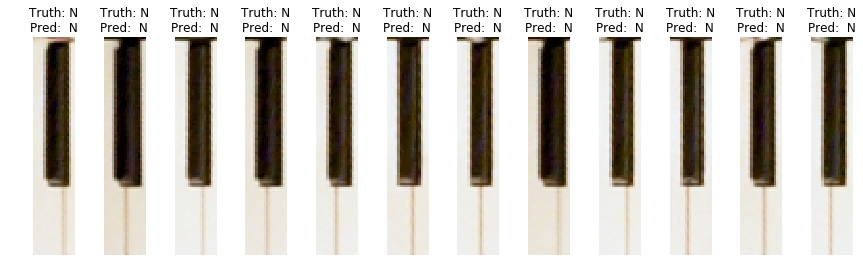

In [7]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb, _ in dataset.data_batch(type='test', size='single', color='black', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = bmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()